In [ ]:
       ## Assingnment

In [ ]:
##Sales_analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sales by Category:
 Category
Electronics    165267.0
Clothing       139054.0
Furniture      127181.0
Name: Amount, dtype: float64

Profit by Category:
              Avg_Profit_per_Order  Total_Profit_Margin
Category                                              
Clothing                11.762908             2.587010
Electronics             34.071429             2.431970
Furniture                9.456790             0.532558

Top Performing Categories:
              Avg_Profit_per_Order  Total_Profit_Margin
Category                                              
Clothing                11.762908             2.587010
Electronics             34.071429             2.431970
Furniture                9.456790             0.532558

Underperforming Categories:
              Avg_Profit_per_Order  Total_Profit_Margin
Category                                              
Clothing                11.762908             2.587010
Electronics             34.071429             2.431970
Furniture          

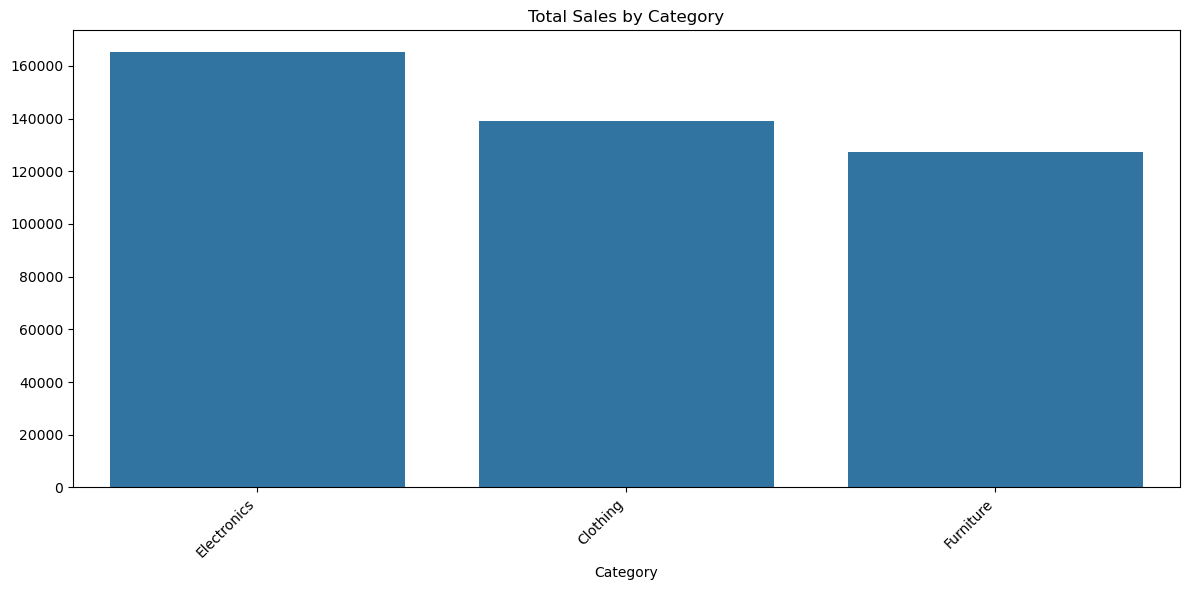

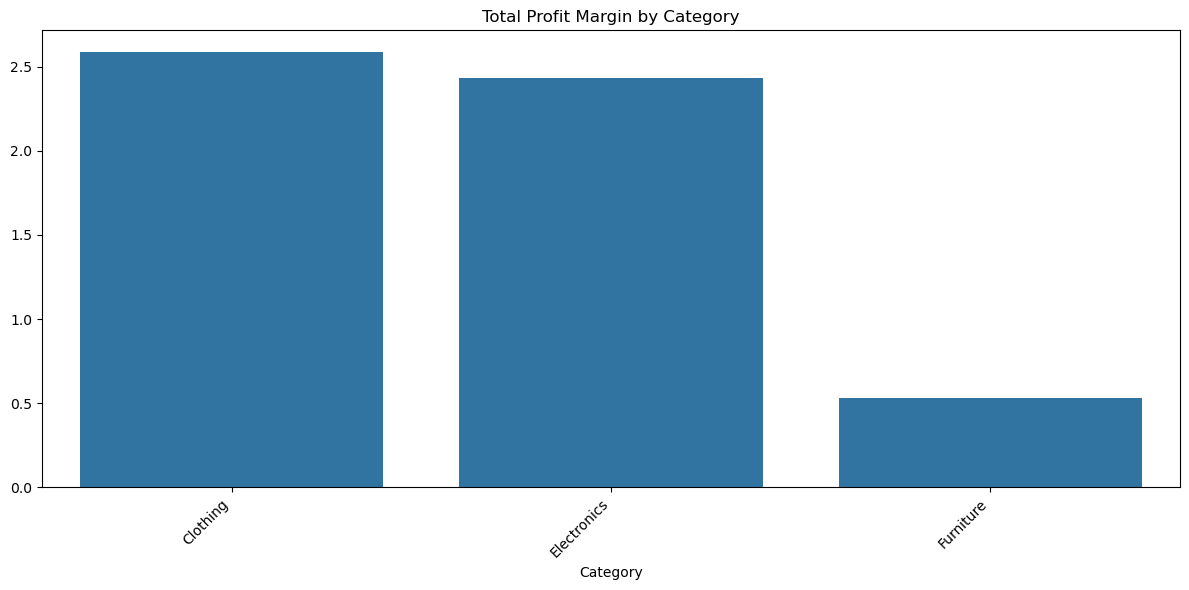

In [3]:
# Part 1: Sales and Profitability Analysis

try:
    orders = pd.read_csv("List_of_Orders_55FFC79CF8.csv", encoding="unicode_escape")  # Handle potential encoding issues
    order_details = pd.read_csv("Order_Details_19795F61CF.csv", encoding="unicode_escape")
except FileNotFoundError:
    print("Error: One or both CSV files not found. Please ensure they are in the correct directory.")
    exit()  # Exit the script if files are not found

merged_data = pd.merge(orders, order_details, on="Order ID")

sales_by_category = merged_data.groupby("Category")["Amount"].sum().sort_values(ascending=False)

profit_by_category = merged_data.groupby("Category").agg(
    Avg_Profit_per_Order=("Profit", "mean"),
    Total_Profit_Margin=("Profit", lambda x: (x.sum() / merged_data["Amount"].sum()) * 100)
).sort_values(by="Total_Profit_Margin", ascending=False)

top_categories = profit_by_category.head(5)
underperforming_categories = profit_by_category.tail(5)  # Get the bottom 5

print("Sales by Category:\n", sales_by_category)
print("\nProfit by Category:\n", profit_by_category)
print("\nTop Performing Categories:\n", top_categories)
print("\nUnderperforming Categories:\n", underperforming_categories)

# Visualization for Part 1
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title("Total Sales by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=profit_by_category.index, y=profit_by_category["Total_Profit_Margin"].values)
plt.title("Total Profit Margin by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Furniture Target Change (%):
    Month of Order Date   Category   Target  Target Change (%)
0               Apr-18  Furniture  10400.0                NaN
4               Aug-18  Furniture  10900.0           4.807692
8               Dec-18  Furniture  11400.0           4.587156
10              Feb-19  Furniture  11600.0           1.754386
9               Jan-19  Furniture  11500.0          -0.862069
3               Jul-18  Furniture  10800.0          -6.086957
2               Jun-18  Furniture  10600.0          -1.851852
11              Mar-19  Furniture  11800.0          11.320755
1               May-18  Furniture  10500.0         -11.016949
7               Nov-18  Furniture  11300.0           7.619048
6               Oct-18  Furniture  11100.0          -1.769912
5               Sep-18  Furniture  11000.0          -0.900901


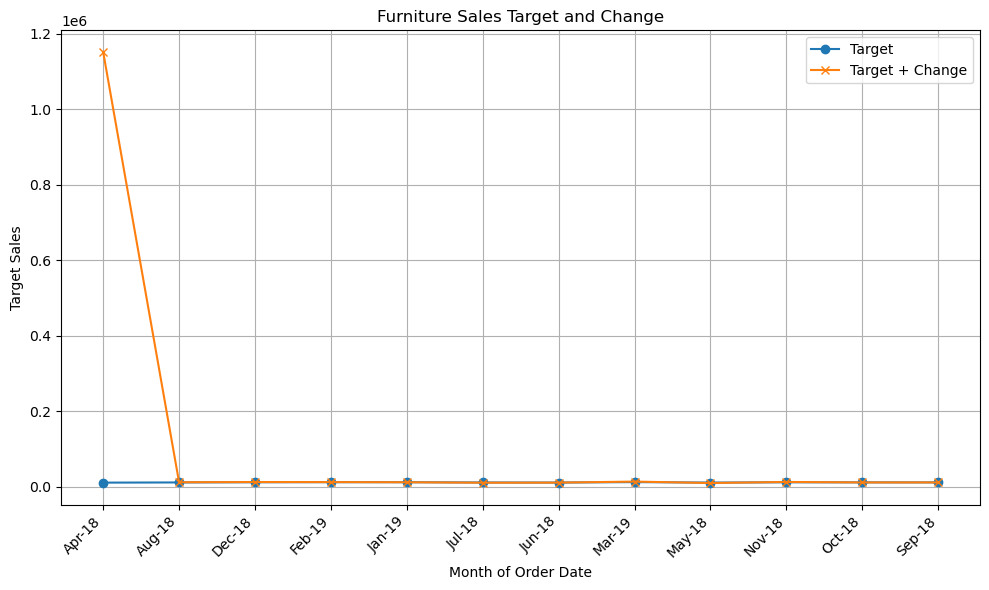

In [5]:
# Part 2: Target Achievement Analysis

try:
    sales_targets = pd.read_csv("Sales_target_DD2E9B96A0.csv", encoding="unicode_escape")
except FileNotFoundError:
    print("Error: Sales Target CSV file not found.")
    exit()

furniture_targets = sales_targets[sales_targets["Category"] == "Furniture"].copy()  # Create a copy to avoid SettingWithCopyWarning
furniture_targets.sort_values("Month of Order Date", inplace=True) # Sort by month to calculate pct_change correctly
furniture_targets["Target Change (%)"] = furniture_targets["Target"].pct_change() * 100


print("\nFurniture Target Change (%):\n", furniture_targets)

# Visualization for Part 2
plt.figure(figsize=(10, 6))
plt.plot(furniture_targets["Month of Order Date"], furniture_targets["Target"], marker='o', label="Target")
plt.plot(furniture_targets["Month of Order Date"], furniture_targets["Target"] * (1 + furniture_targets["Target Change (%)"]/100).fillna(furniture_targets["Target"].mean()/100), marker='x', label="Target + Change") # this line plots the target + change to visualize. It fills NaNs with mean for visualization purposes.
plt.xlabel("Month of Order Date")
plt.ylabel("Target Sales")
plt.title("Furniture Sales Target and Change")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Part 3: Regional Performance Insights


try:
    orders = pd.read_csv("List_of_Orders_55FFC79CF8.csv", encoding="unicode_escape")  # Handle potential encoding issues
    order_details = pd.read_csv("Order_Details_19795F61CF.csv", encoding="unicode_escape")
except FileNotFoundError:
    print("Error: One or both CSV files not found. Please ensure they are in the correct directory.")
    exit()  # Exit the script if files are not found

merged_data = pd.merge(orders, order_details, on="Order ID")
df = pd.DataFrame(merged_data)

# Identify top 5 states by order count
top_5_states = df['State'].value_counts().nlargest(5).index

# Calculate total sales and average profit for top states
top_states_data = df[df['State'].isin(top_5_states)]
performance = top_states_data.groupby('State').agg(
    Total_Sales=('Amount', 'sum'),
    Average_Profit=('Profit', 'mean')
)

print("Top 5 States Performance:")
print(performance)

# Highlight regional disparities
print("\nRegional Disparities:")
highest_sales_state = performance['Total_Sales'].idxmax()
highest_profit_state = performance['Average_Profit'].idxmax()
print(f"State with Highest Total Sales: {highest_sales_state}")
print(f"State with Highest Average Profit: {highest_profit_state}")

# Suggest regions for improvement (example-based on sample data)
print("\nRegions to Prioritize for Improvement:")
if highest_sales_state != highest_profit_state:
    print(f"- {highest_sales_state} has high sales but lower profit margin. Focus on cost optimization.")
    print(f"- {highest_profit_state} has high profit margin but lower sales. Explore sales growth strategies.")

Top 5 States Performance:
                Total_Sales  Average_Profit
State                                      
Delhi               22531.0       40.364865
Gujarat             21058.0        5.344828
Madhya Pradesh     105140.0       16.326471
Maharashtra         95348.0       21.296552
Rajasthan           21149.0       16.986486

Regional Disparities:
State with Highest Total Sales: Madhya Pradesh
State with Highest Average Profit: Delhi

Regions to Prioritize for Improvement:
- Madhya Pradesh has high sales but lower profit margin. Focus on cost optimization.
- Delhi has high profit margin but lower sales. Explore sales growth strategies.
